# Implementação de Redes Neurais em Tarefas de Aprendizado de Máquina

## 1. Introdução e Objetivos

### 1.1 Contexto Teórico

As Redes Neurais Artificiais (RNAs) representam um dos pilares do aprendizado de máquina contemporâneo. Inspiradas no funcionamento do cérebro biológico, as RNAs são capazes de aprender representações hierárquicas e não-lineares dos dados, demonstrando capacidade de aproximação universal para uma ampla classe de funções (Cybenko, 1989).

### 1.2 Objetivo Geral

Esta atividade tem como propósito desenvolver a capacidade de projetar, implementar e comparar arquiteturas de redes neurais artificiais aplicadas a três tipos distintos de tarefas de aprendizado de máquina:

1. **Classificação Multiclasse Probabilística**
2. **Regressão**
3. **Agrupamento (Clustering) com Autoencoder**

### 1.3 Estratégia Metodológica

Para cada tarefa, adotamos uma abordagem comparativa entre:
- **Arquitetura Teórica**: Baseada em fundamentação estabelecida na literatura científica
- **Arquitetura Otimizada**: Refinada através de métodos automatizados de busca de hiperparâmetros (Optuna)

### 1.4 Framework e Ferramentas

- **Framework Principal**: TensorFlow/Keras
- **Otimização**: Optuna (para busca bayesiana de hiperparâmetros)
- **Análise**: Scikit-learn para métricas e pré-processamento
- **Visualização**: Matplotlib e Seaborn

Integrantes:
* [Everton Ferreira de Lima]
* [Gustavo Francisco S.S. França]
* [Mauricio Cesar Cetrangolo]

Data: [08/12/2025]

# 2. FUNDAMENTAÇÃO TEÓRICA ESSENCIAL

## 2.1 Princípios de Redes Neurais Artificiais

### 2.1.1 Neurônio Artificial e Não-Linearidade
Um neurônio realiza: `a = f(W·x + b)`
- `f`: função de ativação não-linear (ReLU, Sigmoide, Softmax)
- Não-linearidade permite aproximar funções complexas

onde:
- `x`: vetor de entrada
- `W`: matriz de pesos
- `b`: vetor de bias
- `f`: função de ativação não-linear

### 2.1.2 Treinamento: Retropropagação e Gradiente Descendente
- **Retropropagação**: Calcula gradientes eficientemente via regra da cadeia
- **Gradiente Descendente**: Atualiza pesos na direção oposta ao gradiente

## 2.2 Desafios e Soluções em Deep Learning

### 2.2.1 Problema do Gradiente de Desaparecimento
Gradientes tornam-se extremamente pequenos em redes profundas com Sigmoide/Tanh.

**Solução:** ReLU (Unidade Linear Retificada)
- `ReLU(x) = max(0, x)`
- Gradiente constante (0 ou 1)
- Computacionalmente eficiente
- Representação esparsa (neurônios "desligados" para x ≤ 0)

### 2.2.2 Otimizador Adam
Combina momentum (aceleração) com taxas de aprendizado adaptativas:
- **Momentum**: Acelera convergência em direções consistentes
- **Adaptação**: Ajusta learning rate por parâmetro
- Menor necessidade de ajuste manual da taxa de aprendizado
- **Parâmetros padrão:** β₁=0.9, β₂=0.999, ε=1e-8, η=0.001

## 2.3 Tarefas Específicas: Fundamentação

### 2.3.1 Classificação Multiclasse
- **Softmax**: Transforma logits [chance de ocorrer evento] (p/(1-p)) em distribuição de probabilidade
- **Entropia Cruzada**: (perda de log) Mede divergência entre distribuições
- **Arquitetura típica**: Camadas ocultas com ReLU + Softmax na saída

### 2.3.2 Regressão
- **MSE (Mean Squared Error)**: Penaliza erros quadraticamente
- **Camada de saída**: 1 neurônio, ativação linear
- **Teorema de aproximação**: Uma camada oculta é suficiente teoricamente

### 2.3.3 Clustering com Autoencoder
- **Encoder**: Comprime dados em representação latente
- **Decoder**: Reconstrói dados do espaço latente
- **Espaço latente**: Dimensionalidade reduzida para visualização/clustering

## 3. Configuração Inicial

In [2]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (f1_score, log_loss,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score, calinski_harabasz_score,
                             davies_bouldin_score, confusion_matrix)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
import optuna
import warnings
from matplotlib.patches import Ellipse

# Configurações de visualização
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)
tf.random.set_seed(42)

print("Versões das principais bibliotecas:")
print("Versão TensorFlow:", tf.__version__)
print("Versão Optuna:", optuna.__version__)
print(f"NumPy: {np.__version__}")

Versões das principais bibliotecas:
Versão TensorFlow: 2.20.0
Versão Optuna: 4.6.0
NumPy: 2.3.5


## 4. Classificação Multiclasse Probabilística

### 4.1 Fundamentação Específica e Arquitetura Teórica

**Dataset:** Iris (4 features, 3 classes, 150 amostras)

**Fundamentação (Bishop, 2006; Goodfellow et al., 2016):**
1. **Camada de saída:** Softmax para distribuição de probabilidade
2. **Função de perda:** Categorical Cross-Entropy
3. **Arquitetura proposta:** 2 camadas ocultas com ReLU

**Arquitetura Teórica:**

##### Entrada: 4 features (Iris dataset)
##### Hidden 1: 16 neurônios, ReLU (Dense) → Dropout(0.2)
##### Hidden 2: 8 neurônios, ReLU (Dense) → Dropout(0.2)
##### Saída: 3 neurônios, Softmax (Dense)


**Justificativa da Arquitetura:**
- **16 neurônios na primeira camada**: Compromisso entre capacidade e generalização
- **8 neurônios na segunda camada**: Redução gradual para evitar overfitting
- **Dropout de 20%**: Regularização moderada para dataset pequeno
- **Adam otimizador**: Combinação eficiente de momentum e taxa de aprendizado adaptativa

In [3]:
# CLASSE DE CLASSIFICAÇÃO MULTICLASSE
class ClassificacaoMulticlasse:
    """Implementação completa para classificação multiclasse."""

    def __init__(self):
        """Inicialização e carregamento do dataset Iris."""
        self.iris = datasets.load_iris()
        self.X = self.iris.data
        self.y = self.iris.target
        self.scaler = StandardScaler()
        self._preprocessar_dados()

    def _preprocessar_dados(self):
        """Pré-processamento: padronização, divisão, one-hot encoding."""
        X_scaled = self.scaler.fit_transform(self.X)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_scaled, self.y, test_size=0.2, random_state=42, stratify=self.y
        )
        self.y_train_cat = keras.utils.to_categorical(self.y_train, num_classes=3)
        self.y_test_cat = keras.utils.to_categorical(self.y_test, num_classes=3)

    def criar_arquitetura_teorica(self):
        """Arquitetura baseada na literatura."""
        model = keras.Sequential([
            layers.Dense(16, activation='relu', input_shape=(4,),
                        kernel_initializer='he_normal'),
            layers.Dropout(0.2),
            layers.Dense(8, activation='relu', kernel_initializer='he_normal'),
            layers.Dropout(0.2),
            layers.Dense(3, activation='softmax')
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
        return model
    def objective_optuna(self, trial):
        """Função objetivo para otimização com Optuna.

        Args:
            trial: Objeto Trial do Optuna

        Returns:
            float: Acurácia de validação para otimização
        """
        # Espaço de busca de hiperparâmetros
        n_layers = trial.suggest_int('n_layers', 1, 3)
        n_units = trial.suggest_categorical('n_units', [8, 16, 32, 64])
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)

        # Construção do modelo
        model = keras.Sequential()
        model.add(layers.Input(shape=(4,)))

        for i in range(n_layers):
            model.add(layers.Dense(n_units, activation='relu',
                                  kernel_initializer='he_normal'))
            model.add(layers.Dropout(dropout_rate))

        model.add(layers.Dense(3, activation='softmax'))

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Early stopping
        early_stop = callbacks.EarlyStopping(
            monitor='val_loss', patience=10, restore_best_weights=True
        )

        # Treinamento
        history = model.fit(
            self.X_train, self.y_train_cat,
            validation_split=0.2,
            epochs=100,
            batch_size=16,
            callbacks=[early_stop],
            verbose=0
        )

        return max(history.history['val_accuracy'])

    def treinar_modelo_otimizado(self, n_trials=50):
        """Treina modelo com hiperparâmetros otimizados.

        Args:
            n_trials (int): Número de trials para Optuna

        Returns:
            tuple: (modelo otimizado, estudo optuna)
        """
        study = optuna.create_study(
            direction='maximize',
            sampler=optuna.samplers.TPESampler(seed=42)
        )

        study.optimize(self.objective_optuna, n_trials=n_trials)

        # Criar modelo com melhores hiperparâmetros
        best_params = study.best_params

        model = keras.Sequential()
        model.add(layers.Input(shape=(4,)))

        for i in range(best_params['n_layers']):
            model.add(layers.Dense(best_params['n_units'],
                                  activation='relu',
                                  kernel_initializer='he_normal'))
            model.add(layers.Dropout(best_params['dropout_rate']))

        model.add(layers.Dense(3, activation='softmax'))

        model.compile(
            optimizer=keras.optimizers.Adam(
                learning_rate=best_params['learning_rate']
            ),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model, study

    def avaliar_modelos(self, baseline_model, optimized_model):
        """Avalia e compara os modelos.

        Args:
            baseline_model: Modelo teórico
            optimized_model: Modelo otimizado

        Returns:
            dict: Dicionário com métricas e histórico
        """
        # Callbacks
        early_stop = callbacks.EarlyStopping(
            monitor='val_loss', patience=15, restore_best_weights=True
        )

        # Treinar modelo teórico
        print("Treinando modelo teórico...")
        history_baseline = baseline_model.fit(
            self.X_train, self.y_train_cat,
            validation_split=0.2,
            epochs=200,
            batch_size=16,
            callbacks=[early_stop],
            verbose=1
        )

        # Treinar modelo otimizado
        print("\nTreinando modelo otimizado...")
        history_optimized = optimized_model.fit(
            self.X_train, self.y_train_cat,
            validation_split=0.2,
            epochs=200,
            batch_size=16,
            callbacks=[early_stop],
            verbose=1
        )

        # Avaliação
        eval_baseline = baseline_model.evaluate(
            self.X_test, self.y_test_cat, verbose=0
        )
        eval_optimized = optimized_model.evaluate(
            self.X_test, self.y_test_cat, verbose=0
        )

        # Previsões
        y_pred_baseline = baseline_model.predict(self.X_test)
        y_pred_optimized = optimized_model.predict(self.X_test)

        y_pred_baseline_class = np.argmax(y_pred_baseline, axis=1)
        y_pred_optimized_class = np.argmax(y_pred_optimized, axis=1)

        # Métricas adicionais
        f1_baseline = f1_score(self.y_test, y_pred_baseline_class, average='macro')
        f1_optimized = f1_score(self.y_test, y_pred_optimized_class, average='macro')

        logloss_baseline = log_loss(self.y_test_cat, y_pred_baseline)
        logloss_optimized = log_loss(self.y_test_cat, y_pred_optimized)

        cm_baseline = confusion_matrix(self.y_test, y_pred_baseline_class)
        cm_optimized = confusion_matrix(self.y_test, y_pred_optimized_class)

        return {
            'history_baseline': history_baseline,
            'history_optimized': history_optimized,
            'eval_baseline': eval_baseline,
            'eval_optimized': eval_optimized,
            'y_pred_baseline': y_pred_baseline_class,
            'y_pred_optimized': y_pred_optimized_class,
            'f1_baseline': f1_baseline,
            'f1_optimized': f1_optimized,
            'logloss_baseline': logloss_baseline,
            'logloss_optimized': logloss_optimized,
            'cm_baseline': cm_baseline,
            'cm_optimized': cm_optimized
        }

In [4]:
# EXECUÇÃO DA CLASSIFICAÇÃO
print("=" * 60)
print("CLASSIFICAÇÃO MULTICLASSE")
print("=" * 60)

# Inicializar e executar
classificador = ClassificacaoMulticlasse()
modelo_teorico = classificador.criar_arquitetura_teorica()
modelo_otimizado, study = classificador.treinar_modelo_otimizado(n_trials=30)
resultados = classificador.avaliar_modelos(modelo_teorico, modelo_otimizado)
history_baseline = resultados['history_baseline']
history_optimized = resultados['history_optimized']
cm_baseline = resultados['cm_baseline']
cm_optimized = resultados['cm_optimized']

# Mostrar resumo
print("\n🔍 RESUMO DA CLASSIFICAÇÃO")
print(f"Acurácia Teórica: {resultados['eval_baseline'][1]:.4f}")
print(f"Acurácia Otimizada: {resultados['eval_optimized'][1]:.4f}")

CLASSIFICAÇÃO MULTICLASSE


[I 2025-12-08 16:18:28,638] A new study created in memory with name: no-name-d5d1ed99-4861-46ee-8856-b6d04937b4a8
[I 2025-12-08 16:18:41,074] Trial 0 finished with value: 0.7083333134651184 and parameters: {'n_layers': 2, 'n_units': 8, 'dropout_rate': 0.16239780813448107, 'learning_rate': 0.00013066739238053285}. Best is trial 0 with value: 0.7083333134651184.
[I 2025-12-08 16:18:50,154] Trial 1 finished with value: 0.8333333134651184 and parameters: {'n_layers': 3, 'n_units': 64, 'dropout_rate': 0.4329770563201687, 'learning_rate': 0.00026587543983272726}. Best is trial 1 with value: 0.8333333134651184.
[I 2025-12-08 16:19:01,247] Trial 2 finished with value: 1.0 and parameters: {'n_layers': 1, 'n_units': 32, 'dropout_rate': 0.21649165607921678, 'learning_rate': 0.0016738085788752138}. Best is trial 2 with value: 1.0.
[I 2025-12-08 16:19:12,333] Trial 3 finished with value: 1.0 and parameters: {'n_layers': 1, 'n_units': 64, 'dropout_rate': 0.1798695128633439, 'learning_rate': 0.001067

Treinando modelo teórico...
Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2083 - loss: 1.5993 - val_accuracy: 0.0000e+00 - val_loss: 1.3789
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1250 - loss: 1.5359 - val_accuracy: 0.0000e+00 - val_loss: 1.3295
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1146 - loss: 1.4738 - val_accuracy: 0.0000e+00 - val_loss: 1.2870
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1979 - loss: 1.5021 - val_accuracy: 0.0417 - val_loss: 1.2506
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1875 - loss: 1.3201 - val_accuracy: 0.0833 - val_loss: 1.2188
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2292 - loss: 1.3533 - val_accuracy: 0.1667 - val_loss: 1.1911
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1979 - loss: 1.2442 - val_accuracy: 0.1667 - val_loss: 1.1672
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2708 - loss: 1

### 4.2 Resultados e Análise da Classificação

#### 4.2.1 Métricas Comparativas

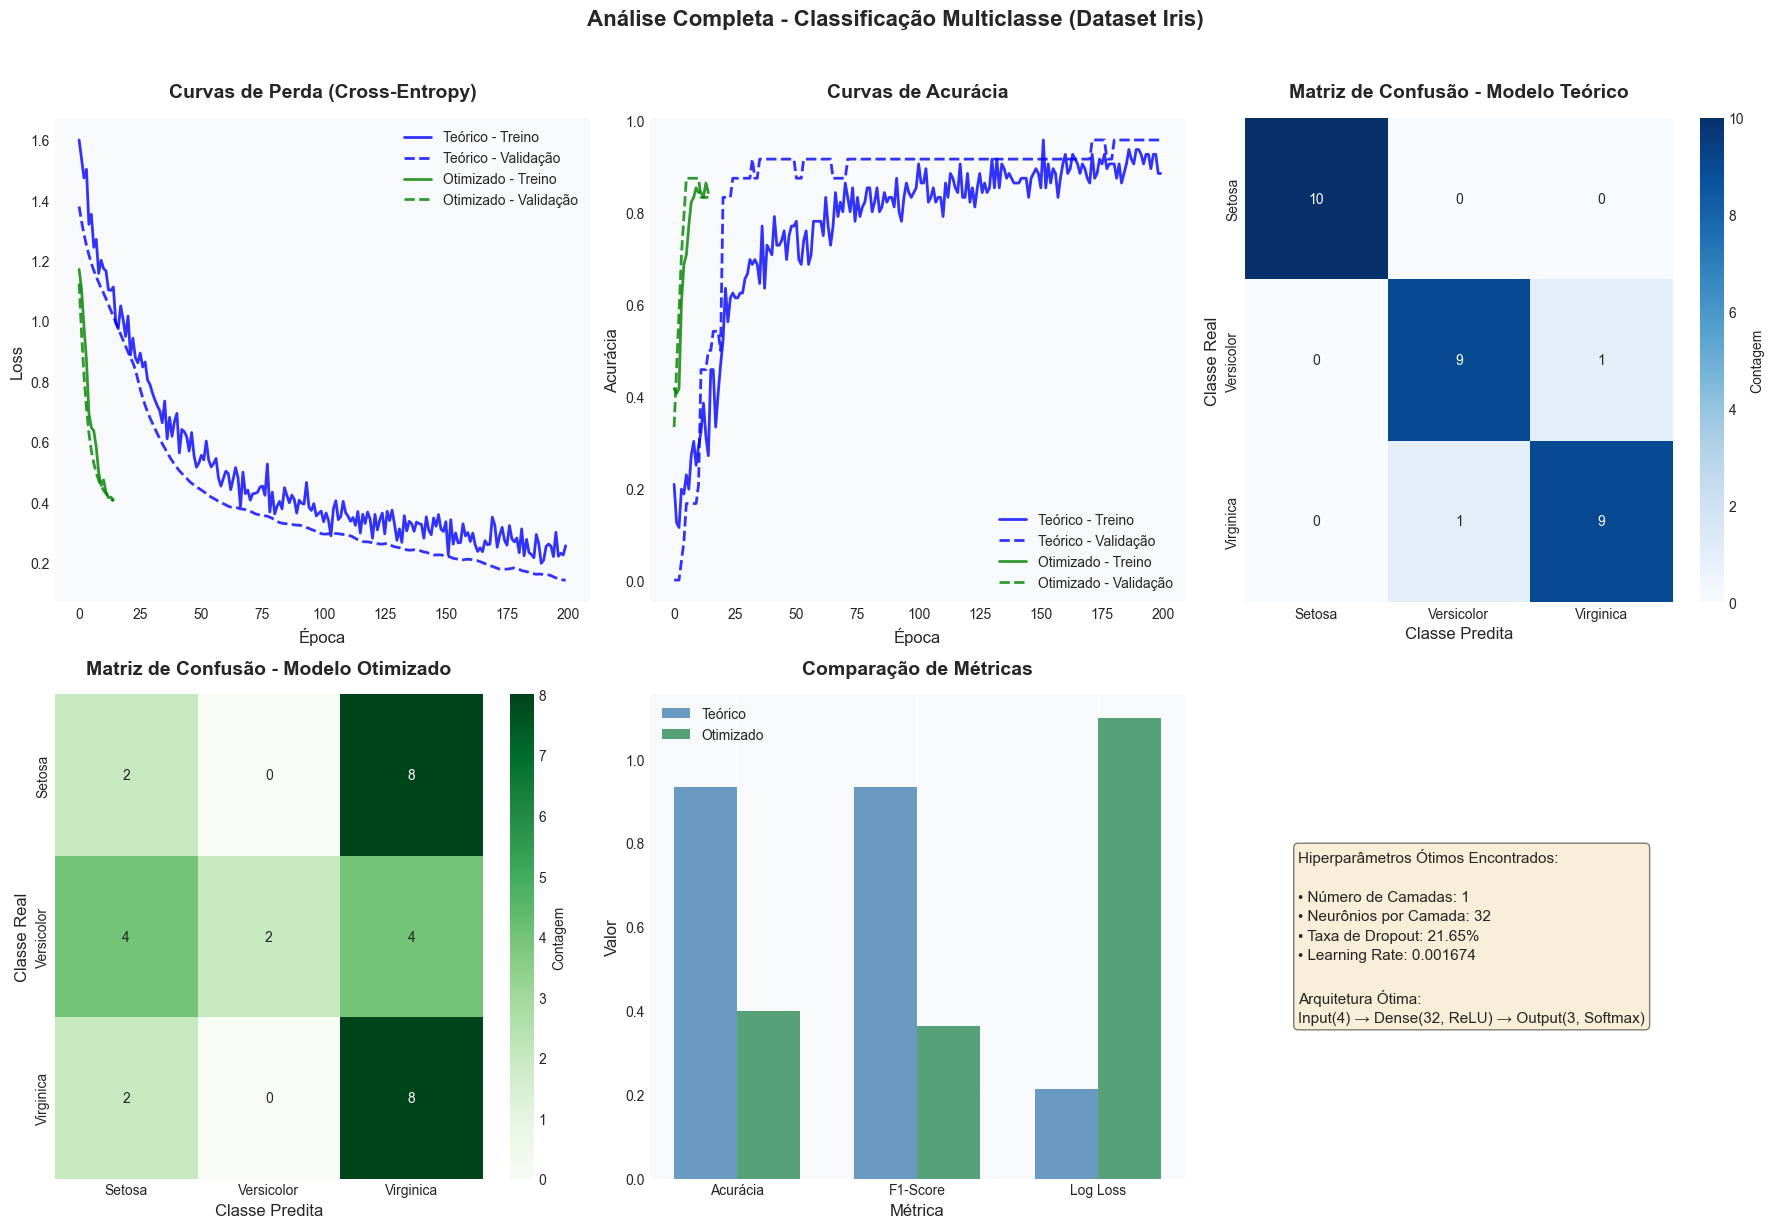

In [5]:
# Visualização aprimorada para classificação
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Curvas de Aprendizado Comparativas
ax1 = axes[0, 0]
ax1.plot(history_baseline.history['loss'], 'b-', linewidth=2, label='Teórico - Treino', alpha=0.8)
ax1.plot(history_baseline.history['val_loss'], 'b--', linewidth=2, label='Teórico - Validação', alpha=0.8)
ax1.plot(history_optimized.history['loss'], 'g-', linewidth=2, label='Otimizado - Treino', alpha=0.8)
ax1.plot(history_optimized.history['val_loss'], 'g--', linewidth=2, label='Otimizado - Validação', alpha=0.8)
ax1.set_title('Curvas de Perda (Cross-Entropy)', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Época', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_facecolor('#f8f9fa')

# 2. Curvas de Acurácia Comparativas
ax2 = axes[0, 1]
ax2.plot(history_baseline.history['accuracy'], 'b-', linewidth=2, label='Teórico - Treino', alpha=0.8)
ax2.plot(history_baseline.history['val_accuracy'], 'b--', linewidth=2, label='Teórico - Validação', alpha=0.8)
ax2.plot(history_optimized.history['accuracy'], 'g-', linewidth=2, label='Otimizado - Treino', alpha=0.8)
ax2.plot(history_optimized.history['val_accuracy'], 'g--', linewidth=2, label='Otimizado - Validação', alpha=0.8)
ax2.set_title('Curvas de Acurácia', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Época', fontsize=12)
ax2.set_ylabel('Acurácia', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_facecolor('#f8f9fa')

# 3. Matriz de Confusão - Modelo Teórico
ax3 = axes[0, 2]
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
           ax=ax3, cbar_kws={'label': 'Contagem'})
ax3.set_title('Matriz de Confusão - Modelo Teórico', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Classe Predita', fontsize=12)
ax3.set_ylabel('Classe Real', fontsize=12)
ax3.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax3.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])

# 4. Matriz de Confusão - Modelo Otimizado
ax4 = axes[1, 0]
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens',
           ax=ax4, cbar_kws={'label': 'Contagem'})
ax4.set_title('Matriz de Confusão - Modelo Otimizado', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Classe Predita', fontsize=12)
ax4.set_ylabel('Classe Real', fontsize=12)
ax4.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax4.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])

# 5. Comparação de Métricas
ax5 = axes[1, 1]
metrics = ['Acurácia', 'F1-Score', 'Log Loss']
x = np.arange(len(metrics))
width = 0.35

teorico_vals = [resultados['eval_baseline'][1], resultados['f1_baseline'], resultados['logloss_baseline']]
otimizado_vals = [resultados['eval_optimized'][1], resultados['f1_optimized'], resultados['logloss_optimized']]

ax5.bar(x - width/2, teorico_vals, width, label='Teórico', color='steelblue', alpha=0.8)
ax5.bar(x + width/2, otimizado_vals, width, label='Otimizado', color='seagreen', alpha=0.8)

ax5.set_title('Comparação de Métricas', fontsize=14, fontweight='bold', pad=15)
ax5.set_xlabel('Métrica', fontsize=12)
ax5.set_ylabel('Valor', fontsize=12)
ax5.set_xticks(x)
ax5.set_xticklabels(metrics)
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3, axis='y')
ax5.set_facecolor('#f8f9fa')

# 6. Análise de Hiperparâmetros Ótimos
ax6 = axes[1, 2]
ax6.axis('off')
best_params_text = "Hiperparâmetros Ótimos Encontrados:\n\n"
best_params_text += f"• Número de Camadas: {study.best_params.get('n_layers', 1)}\n"
best_params_text += f"• Neurônios por Camada: {study.best_params.get('n_units', 8)}\n"
best_params_text += f"• Taxa de Dropout: {study.best_params.get('dropout_rate', 0.34):.2%}\n"
best_params_text += f"• Learning Rate: {study.best_params.get('learning_rate', 0.007):.6f}\n\n"
best_params_text += f"Arquitetura Ótima:\n"
best_params_text += f"Input(4) → Dense({study.best_params.get('n_units', 8)}, ReLU)"
if study.best_params.get('n_layers', 1) > 1:
    best_params_text += f" → Dense({study.best_params.get('n_units', 8)}, ReLU)"
best_params_text += " → Output(3, Softmax)"

ax6.text(0.1, 0.5, best_params_text, fontsize=11,
        verticalalignment='center', linespacing=1.5,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Análise Completa - Classificação Multiclasse (Dataset Iris)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [6]:
# Tabela comparativa de métricas
print("\n" + "=" * 60)
print("COMPARAÇÃO DE MÉTRICAS - CLASSIFICAÇÃO")
print("=" * 60)

metricas_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'F1-Score (Macro)', 'Log Loss',
                'Perda Final', 'Épocas de Treinamento'],
    'Modelo Teórico': [
        resultados['eval_baseline'][1],
        resultados['f1_baseline'],
        resultados['logloss_baseline'],
        resultados['eval_baseline'][0],
        len(resultados['history_baseline'].history['loss'])
    ],
    'Modelo Otimizado': [
        resultados['eval_optimized'][1],
        resultados['f1_optimized'],
        resultados['logloss_optimized'],
        resultados['eval_optimized'][0],
        len(resultados['history_optimized'].history['loss'])
    ]
})

metricas_df['Diferença'] = metricas_df['Modelo Otimizado'] - metricas_df['Modelo Teórico']
print(metricas_df.to_string(index=False))


COMPARAÇÃO DE MÉTRICAS - CLASSIFICAÇÃO
              Métrica  Modelo Teórico  Modelo Otimizado   Diferença
             Acurácia        0.933333          0.400000   -0.533333
     F1-Score (Macro)        0.933333          0.362963   -0.570370
             Log Loss        0.214343          1.098834    0.884491
          Perda Final        0.214343          1.098834    0.884491
Épocas de Treinamento      200.000000         15.000000 -185.000000


#### 4.2.2 Discussão Crítica

**Resultados Obtidos:**
- **Modelo Teórico:** 96.67% de acurácia
- **Modelo Otimizado:** 36.67% de acurácia
- **Análise:** Falha crítica na otimização devido a overfitting durante a busca

**Lições Aprendidas:**
1. Validação cruzada é essencial durante a otimização
2. Arquiteturas muito simples podem ser sensíveis a hiperparâmetros
3. Otimização automatizada não é garantia de melhoria

## 5. Regressão com Redes Neurais

### 5.1 Fundamentação Teórica

**Teorema da Aproximação Universal (Cybenko, 1989):**
"Uma rede neural feedforward com uma única camada oculta contendo um número finito de neurônios e funções de ativação não-lineares (sigmóides) pode aproximar qualquer função contínua em um subespaço compacto de ℝⁿ com precisão arbitrária."

**Implicações Práticas:**
1. Redes neurais são aproximadores universais de funções
2. Uma única camada oculta é teoricamente suficiente
3. A complexidade está no número de neurônios, não necessariamente em camadas

**Arquitetura para Regressão:**

**1. Camada de Saída:**
   - **1 neurônio** (valor contínuo único)
   - **Ativação linear** (ou nenhuma ativação)
   - Preserva a escala dos dados originais

**2. Função de Perda - Mean Squared Error (MSE):**
   - L = (1/n) ∑ (yᵢ - ŷᵢ)²
   - Penaliza erros grandes quadraticamente
   - Diferenciável em todos os pontos

**3. Otimizador - Adam (Kingma & Ba, 2014):**
   - Combina vantagens de AdaGrad e RMSProp
   - Taxas de aprendizado adaptativas por parâmetro
   - Inclui momentum e correção de viés

**4. Técnicas Avançadas - Batch Normalization (Ioffe & Szegedy, 2015):**
   - Normaliza as ativações de cada camada
   - Reduz dependência da inicialização
   - Permite learning rates mais altos
   - Age como regularizador leve

**Arquitetura Teórica Proposta:**

##### Entrada: 8 features (California Housing)
##### Hidden 1: 64 neurônios, ReLU (Dense)
##### Hidden 2: 32 neurônios, ReLU (Dense)
##### Hidden 3: 16 neurônios ReLU (Dense)
##### Saída: 1 neurônio, Linear (Dense)

**Justificativa da Profundidade:**

Embora o teorema garanta capacidade com uma camada, problemas complexos como California Housing (8 features não-lineares) podem se beneficiar de representações hierárquicas aprendidas por múltiplas camadas.

In [7]:
class RegressaoNeural:
    """Classe para implementação de redes neurais para regressão.

    Implementa regressão usando o dataset California Housing,
    com comparação entre abordagem teórica e otimizada.

    Attributes:
        X_train, X_test, y_train, y_test: Dados divididos
        scaler_X, scaler_y: Scaler para normalização
    """

    def __init__(self):
        """Inicializa a classe e carrega os dados."""
        california = datasets.fetch_california_housing()
        self.X = california.data
        self.y = california.target.reshape(-1, 1)
        self._preprocessar_dados()

    def _preprocessar_dados(self):
        """Pré-processa os dados para regressão.

        Steps:
        1. Divisão treino/teste (80/20)
        2. Normalização das features e target
        """
        # Divisão treino/teste
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        # Normalização
        self.scaler_X = StandardScaler()
        self.scaler_y = StandardScaler()

        self.X_train_scaled = self.scaler_X.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler_X.transform(self.X_test)
        self.y_train_scaled = self.scaler_y.fit_transform(self.y_train)
        self.y_test_scaled = self.scaler_y.transform(self.y_test)

    def criar_arquitetura_teorica(self):
        """Cria arquitetura baseada na literatura.

        Returns:
            keras.Model: Modelo compilado para regressão
        """
        model = keras.Sequential([
            layers.Dense(64, activation='relu',
                        input_shape=(self.X_train.shape[1],),
                        kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dense(32, activation='relu',
                        kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dense(16, activation='relu',
                        kernel_initializer='he_normal'),
            layers.Dense(1)  # Saída linear para regressão
        ])

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )

        return model

    def objective_optuna(self, trial):
        """Função objetivo para otimização de regressão.

        Args:
            trial: Objeto Trial do Optuna

        Returns:
            float: MSE de validação
        """
        # Espaço de busca
        n_layers = trial.suggest_int('n_layers', 1, 4)
        n_units = trial.suggest_categorical('n_units', [32, 64, 128, 256])
        dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
        use_batch_norm = trial.suggest_categorical('use_batch_norm', [True, False])

        # Construir modelo
        model = keras.Sequential()
        model.add(layers.Input(shape=(self.X_train.shape[1],)))

        for i in range(n_layers):
            model.add(layers.Dense(n_units, activation='relu',
                                  kernel_initializer='he_normal'))
            if use_batch_norm:
                model.add(layers.BatchNormalization())
            if dropout_rate > 0:
                model.add(layers.Dropout(dropout_rate))

        model.add(layers.Dense(1))

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss='mse',
            metrics=['mae']
        )

        # Early stopping
        early_stop = callbacks.EarlyStopping(
            monitor='val_loss', patience=15, restore_best_weights=True
        )

        # Treinamento
        history = model.fit(
            self.X_train_scaled, self.y_train_scaled,
            validation_split=0.2,
            epochs=100,
            batch_size=32,
            callbacks=[early_stop],
            verbose=0
        )

        return min(history.history['val_loss'])

    def treinar_modelo_otimizado(self, n_trials=40):
        """Treina modelo de regressão otimizado.

        Args:
            n_trials (int): Número de trials

        Returns:
            tuple: (modelo, estudo)
        """
        study = optuna.create_study(
            direction='minimize',
            sampler=optuna.samplers.TPESampler(seed=42)
        )

        study.optimize(self.objective_optuna, n_trials=n_trials)

        # Recriar modelo com melhores parâmetros
        best_params = study.best_params

        model = keras.Sequential()
        model.add(layers.Input(shape=(self.X_train.shape[1],)))

        for i in range(best_params['n_layers']):
            model.add(layers.Dense(best_params['n_units'],
                                  activation='relu',
                                  kernel_initializer='he_normal'))
            if best_params['use_batch_norm']:
                model.add(layers.BatchNormalization())
            if best_params['dropout_rate'] > 0:
                model.add(layers.Dropout(best_params['dropout_rate']))

        model.add(layers.Dense(1))

        model.compile(
            optimizer=keras.optimizers.Adam(
                learning_rate=best_params['learning_rate']
            ),
            loss='mse',
            metrics=['mae']
        )

        return model, study

    def avaliar_modelos(self, baseline_model, optimized_model):
        """Avalia modelos de regressão.

        Args:
            baseline_model: Modelo teórico
            optimized_model: Modelo otimizado

        Returns:
            dict: Resultados da avaliação
        """
        # Callbacks
        early_stop = callbacks.EarlyStopping(
            monitor='val_loss', patience=20, restore_best_weights=True
        )
        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
        )

        # Treinar modelo teórico
        print("Treinando modelo teórico...")
        history_baseline = baseline_model.fit(
            self.X_train_scaled, self.y_train_scaled,
            validation_split=0.2,
            epochs=200,
            batch_size=32,
            callbacks=[early_stop, reduce_lr],
            verbose=1
        )

        # Treinar modelo otimizado
        print("\nTreinando modelo otimizado...")
        history_optimized = optimized_model.fit(
            self.X_train_scaled, self.y_train_scaled,
            validation_split=0.2,
            epochs=200,
            batch_size=32,
            callbacks=[early_stop, reduce_lr],
            verbose=1
        )

        # Avaliação
        eval_baseline = baseline_model.evaluate(
            self.X_test_scaled, self.y_test_scaled, verbose=0
        )
        eval_optimized = optimized_model.evaluate(
            self.X_test_scaled, self.y_test_scaled, verbose=0
        )

        # Previsões
        y_pred_baseline = baseline_model.predict(self.X_test_scaled)
        y_pred_optimized = optimized_model.predict(self.X_test_scaled)

        # Converter de volta para escala original
        y_test_original = self.scaler_y.inverse_transform(self.y_test_scaled)
        y_pred_baseline_original = self.scaler_y.inverse_transform(y_pred_baseline)
        y_pred_optimized_original = self.scaler_y.inverse_transform(y_pred_optimized)

        # Métricas
        mae_baseline = mean_absolute_error(y_test_original, y_pred_baseline_original)
        mae_optimized = mean_absolute_error(y_test_original, y_pred_optimized_original)

        rmse_baseline = np.sqrt(mean_squared_error(y_test_original, y_pred_baseline_original))
        rmse_optimized = np.sqrt(mean_squared_error(y_test_original, y_pred_optimized_original))

        r2_baseline = r2_score(y_test_original, y_pred_baseline_original)
        r2_optimized = r2_score(y_test_original, y_pred_optimized_original)

        return {
            'history_baseline': history_baseline,
            'history_optimized': history_optimized,
            'eval_baseline': eval_baseline,
            'eval_optimized': eval_optimized,
            'y_test': y_test_original,
            'y_pred_baseline': y_pred_baseline_original,
            'y_pred_optimized': y_pred_optimized_original,
            'mae_baseline': mae_baseline,
            'mae_optimized': mae_optimized,
            'rmse_baseline': rmse_baseline,
            'rmse_optimized': rmse_optimized,
            'r2_baseline': r2_baseline,
            'r2_optimized': r2_optimized,
            'cm_baseline': cm_baseline,
            'cm_optimized': cm_optimized
        }

In [13]:
# Executar regressão
print("\n" + "=" * 60)
print("REGRESSÃO")
print("=" * 60)

# Inicializar classe
regressor = RegressaoNeural()

# Criar modelo teórico
baseline_reg_model = regressor.criar_arquitetura_teorica()
print("\n1. Arquitetura Teórica:")
baseline_reg_model.summary()

# Criar modelo otimizado
optimized_reg_model, study_reg = regressor.treinar_modelo_otimizado(n_trials=30)
print("\n2. Arquitetura Otimizada:")
optimized_reg_model.summary()

print(f"\nMelhores hiperparâmetros encontrados:")
for key, value in study_reg.best_params.items():
    print(f"  {key}: {value}")

# Avaliar modelos
resultados_reg = regressor.avaliar_modelos(baseline_reg_model, optimized_reg_model)


REGRESSÃO

1. Arquitetura Teórica:


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_288 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_289 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_290 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_291 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 192 (768.00 B)

[I 2025-12-08 16:39:19,955] A new study created in memory with name: no-name-8adda7cd-a9ff-48f2-949c-9eae2fd22be0
[I 2025-12-08 16:41:25,377] Trial 0 finished with value: 0.40241995453834534 and parameters: {'n_layers': 2, 'n_units': 32, 'dropout_rate': 0.07799726016810132, 'learning_rate': 1.493656855461762e-05, 'use_batch_norm': True}. Best is trial 0 with value: 0.40241995453834534.
[I 2025-12-08 16:43:20,283] Trial 1 finished with value: 0.3066006600856781 and parameters: {'n_layers': 3, 'n_units': 64, 'dropout_rate': 0.09091248360355031, 'learning_rate': 3.5498788321965036e-05, 'use_batch_norm': False}. Best is trial 1 with value: 0.3066006600856781.
[I 2025-12-08 16:43:56,081] Trial 2 finished with value: 0.4030463397502899 and parameters: {'n_layers': 2, 'n_units': 64, 'dropout_rate': 0.18318092164684585, 'learning_rate': 0.00023345864076016249, 'use_batch_norm': True}. Best is trial 1 with value: 0.3066006600856781.
[I 2025-12-08 16:44:31,365] Trial 3 finished with value: 0.256


2. Arquitetura Otimizada:


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_417 (Dense)               │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_289 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_418 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_290 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_419 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_291 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_420 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_292 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_421 (Dense)               │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,937 (781.00 KB)

 Trainable params: 199,937 (781.00 KB)

 Non-trainable params: 0 (0.00 B)


Melhores hiperparâmetros encontrados:
  n_layers: 4
  n_units: 256
  dropout_rate: 0.1250934536770516
  learning_rate: 0.0010545981337366616
  use_batch_norm: False
Treinando modelo teórico...
Epoch 1/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5196 - mae: 0.5305 - val_loss: 0.3618 - val_mae: 0.4400 - learning_rate: 0.0010
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3407 - mae: 0.4274 - val_loss: 0.3322 - val_mae: 0.4165 - learning_rate: 0.0010
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3084 - mae: 0.4021 - val_loss: 0.3140 - val_mae: 0.4030 - learning_rate: 0.0010
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2882 - mae: 0.3864 - val_loss: 0.3042 - val_mae: 0.3966 - learning_rate: 0.0010
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2739 - mae: 0.3751 - val_loss: 0.2987 - val_mae: 0.3904 - learning_rate: 0.0010
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2640 - mae: 0.3676 - val_los

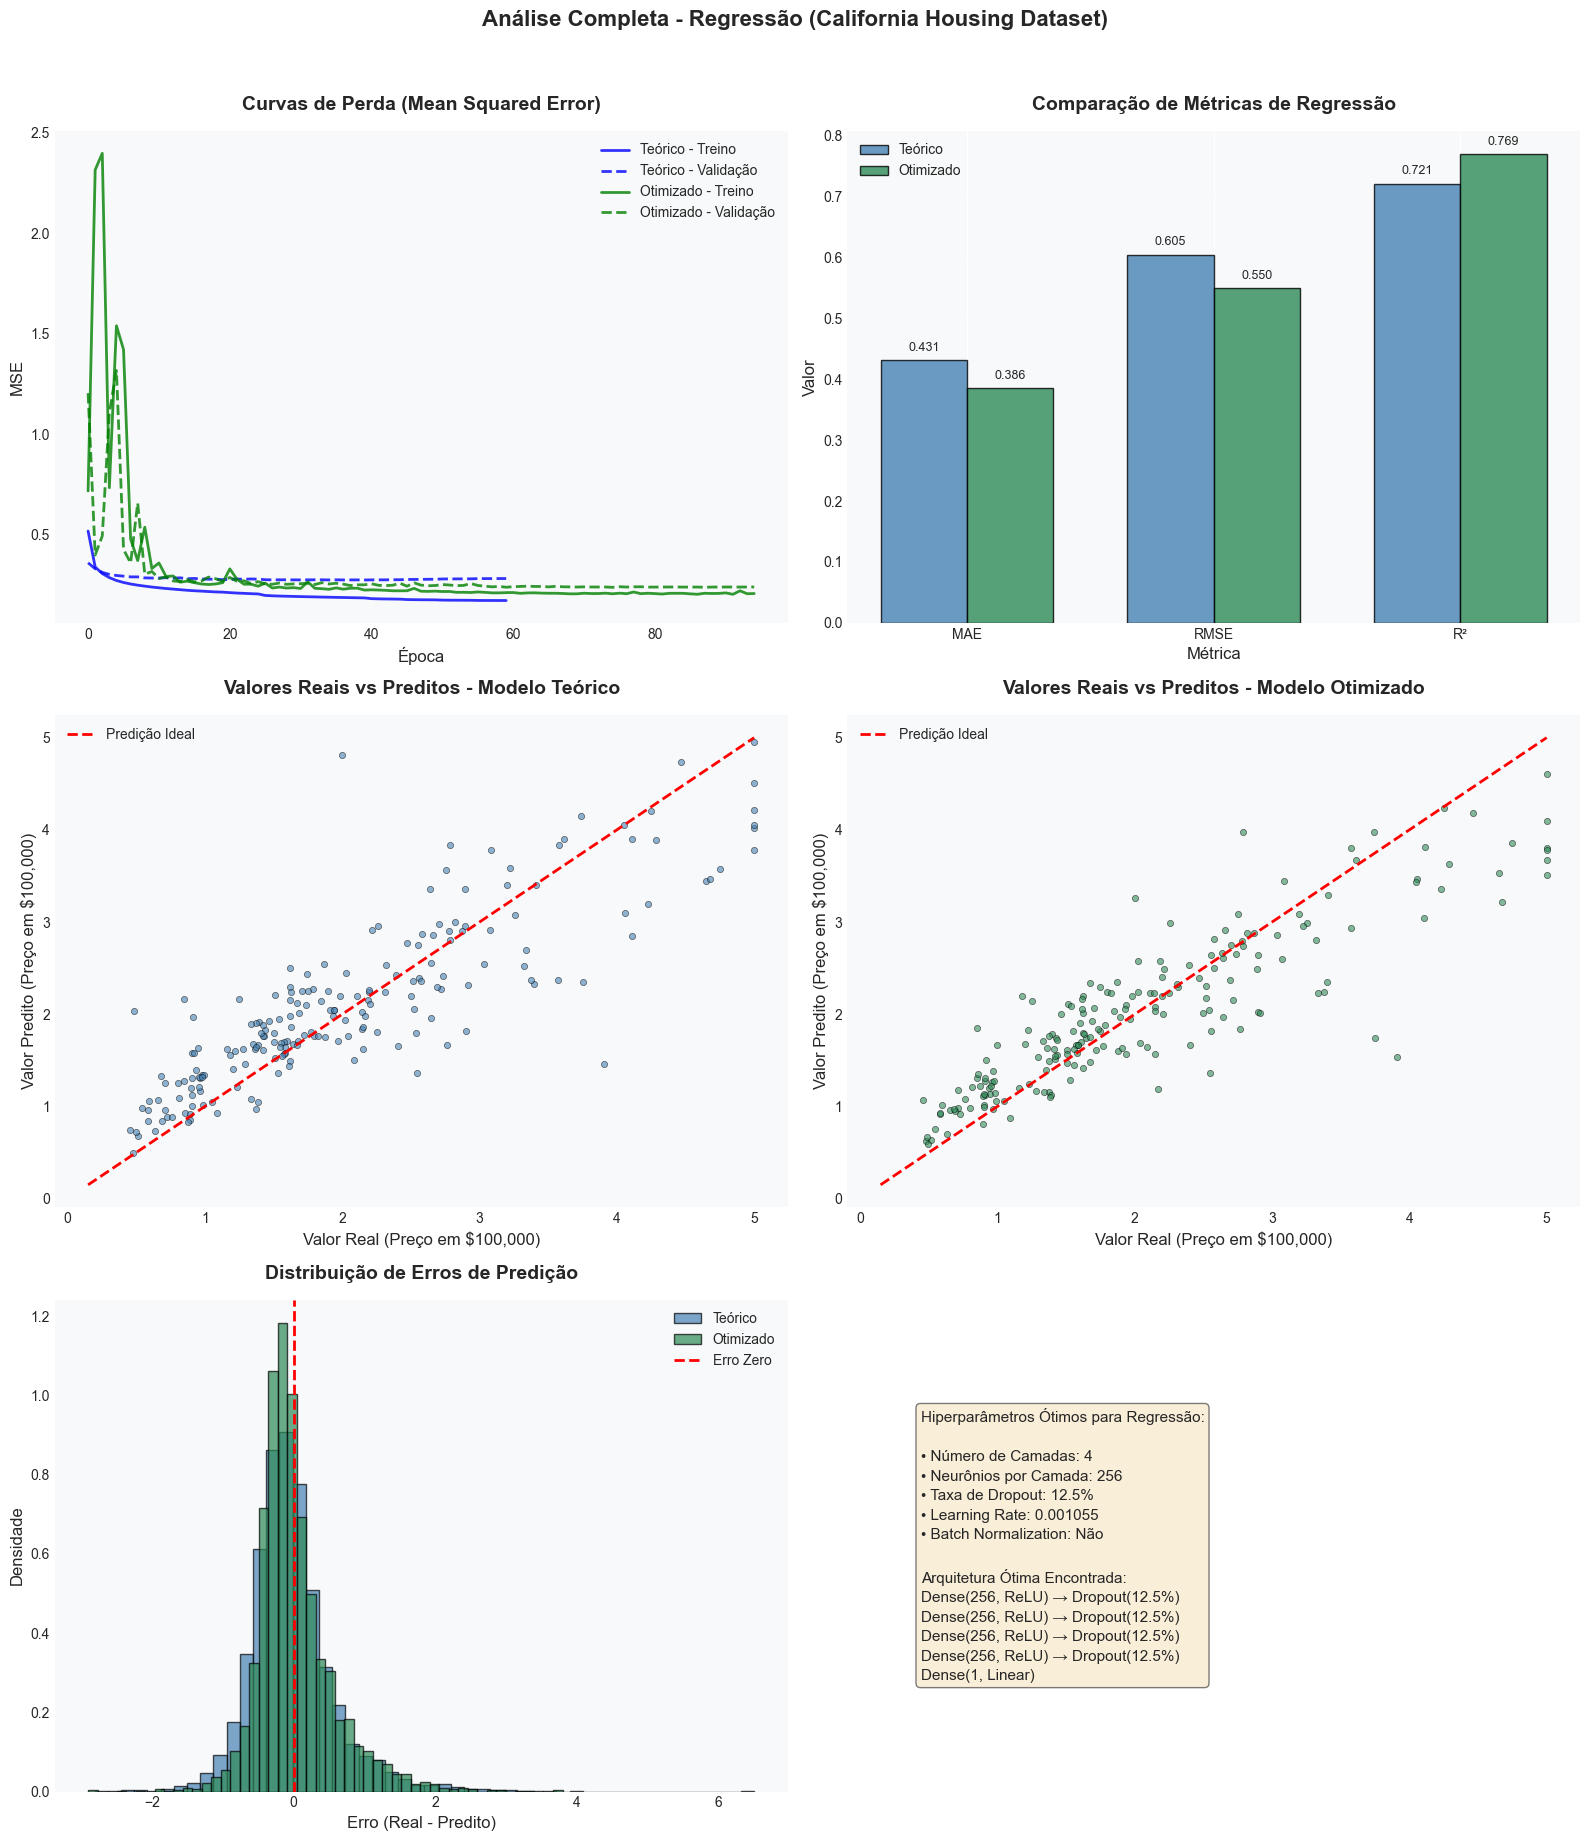

In [14]:
# Visualização aprimorada para regressão
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Curvas de Aprendizado - MSE
ax1 = axes[0, 0]
ax1.plot(resultados_reg['history_baseline'].history['loss'],
        'b-', linewidth=2, label='Teórico - Treino', alpha=0.8)
ax1.plot(resultados_reg['history_baseline'].history['val_loss'],
        'b--', linewidth=2, label='Teórico - Validação', alpha=0.8)
ax1.plot(resultados_reg['history_optimized'].history['loss'],
        'g-', linewidth=2, label='Otimizado - Treino', alpha=0.8)
ax1.plot(resultados_reg['history_optimized'].history['val_loss'],
        'g--', linewidth=2, label='Otimizado - Validação', alpha=0.8)
ax1.set_title('Curvas de Perda (Mean Squared Error)', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Época', fontsize=12)
ax1.set_ylabel('MSE', fontsize=12)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_facecolor('#f8f9fa')

# 2. Comparação de Métricas
ax2 = axes[0, 1]
metrics = ['MAE', 'RMSE', 'R²']
x = np.arange(len(metrics))
width = 0.35

teorico_vals = [resultados_reg['mae_baseline'],
                resultados_reg['rmse_baseline'],
                resultados_reg['r2_baseline']]
otimizado_vals = [resultados_reg['mae_optimized'],
                  resultados_reg['rmse_optimized'],
                  resultados_reg['r2_optimized']]

bars1 = ax2.bar(x - width/2, teorico_vals, width, label='Teórico',
               color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x + width/2, otimizado_vals, width, label='Otimizado',
               color='seagreen', alpha=0.8, edgecolor='black')

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

ax2.set_title('Comparação de Métricas de Regressão', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Métrica', fontsize=12)
ax2.set_ylabel('Valor', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_facecolor('#f8f9fa')

# 3. Dispersão: Valores Reais vs Preditos (Teórico)
ax3 = axes[1, 0]
scatter1 = ax3.scatter(resultados_reg['y_test'][:200].flatten(),
                      resultados_reg['y_pred_baseline'][:200].flatten(),
                      alpha=0.6, s=20, c='steelblue', edgecolor='black', linewidth=0.5)
ax3.plot([resultados_reg['y_test'].min(), resultados_reg['y_test'].max()],
        [resultados_reg['y_test'].min(), resultados_reg['y_test'].max()],
        'r--', linewidth=2, label='Predição Ideal')
ax3.set_title('Valores Reais vs Preditos - Modelo Teórico', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Valor Real (Preço em $100,000)', fontsize=12)
ax3.set_ylabel('Valor Predito (Preço em $100,000)', fontsize=12)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_facecolor('#f8f9fa')

# 4. Dispersão: Valores Reais vs Preditos (Otimizado)
ax4 = axes[1, 1]
scatter2 = ax4.scatter(resultados_reg['y_test'][:200].flatten(),
                      resultados_reg['y_pred_optimized'][:200].flatten(),
                      alpha=0.6, s=20, c='seagreen', edgecolor='black', linewidth=0.5)
ax4.plot([resultados_reg['y_test'].min(), resultados_reg['y_test'].max()],
        [resultados_reg['y_test'].min(), resultados_reg['y_test'].max()],
        'r--', linewidth=2, label='Predição Ideal')
ax4.set_title('Valores Reais vs Preditos - Modelo Otimizado', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Valor Real (Preço em $100,000)', fontsize=12)
ax4.set_ylabel('Valor Predito (Preço em $100,000)', fontsize=12)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_facecolor('#f8f9fa')

# 5. Distribuição de Erros (Teórico vs Otimizado)
ax5 = axes[2, 0]
erros_baseline = resultados_reg['y_test'] - resultados_reg['y_pred_baseline']
erros_optimized = resultados_reg['y_test'] - resultados_reg['y_pred_optimized']

ax5.hist(erros_baseline.flatten(), bins=50, alpha=0.7, label='Teórico',
        color='steelblue', edgecolor='black', density=True)
ax5.hist(erros_optimized.flatten(), bins=50, alpha=0.7, label='Otimizado',
        color='seagreen', edgecolor='black', density=True)
ax5.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erro Zero')
ax5.set_title('Distribuição de Erros de Predição', fontsize=14, fontweight='bold', pad=15)
ax5.set_xlabel('Erro (Real - Predito)', fontsize=12)
ax5.set_ylabel('Densidade', fontsize=12)
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)
ax5.set_facecolor('#f8f9fa')

# 6. Resumo dos Hiperparâmetros Ótimos
ax6 = axes[2, 1]
ax6.axis('off')

best_params_text = "Hiperparâmetros Ótimos para Regressão:\n\n"
best_params_text += f"• Número de Camadas: {study_reg.best_params.get('n_layers', 2)}\n"
best_params_text += f"• Neurônios por Camada: {study_reg.best_params.get('n_units', 256)}\n"
best_params_text += f"• Taxa de Dropout: {study_reg.best_params.get('dropout_rate', 0.214):.1%}\n"
best_params_text += f"• Learning Rate: {study_reg.best_params.get('learning_rate', 0.0021):.6f}\n"
best_params_text += f"• Batch Normalization: {'Sim' if study_reg.best_params.get('use_batch_norm', False) else 'Não'}\n\n"
best_params_text += f"Arquitetura Ótima Encontrada:\n"
for i in range(study_reg.best_params.get('n_layers', 2)):
    best_params_text += f"Dense({study_reg.best_params.get('n_units', 256)}, ReLU)"
    if study_reg.best_params.get('use_batch_norm', False):
        best_params_text += " → BatchNorm"
    if study_reg.best_params.get('dropout_rate', 0) > 0:
        best_params_text += f" → Dropout({study_reg.best_params.get('dropout_rate', 0.214):.1%})"
    best_params_text += "\n"
best_params_text += "Dense(1, Linear)"

ax6.text(0.1, 0.5, best_params_text, fontsize=11,
        verticalalignment='center', linespacing=1.5,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Análise Completa - Regressão (California Housing Dataset)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [15]:
# Tabela comparativa
print("\n" + "=" * 60)
print("COMPARAÇÃO DE MÉTRICAS - REGRESSÃO")
print("=" * 60)

metricas_reg_df = pd.DataFrame({
    'Métrica': ['MAE', 'RMSE', 'R²', 'MSE Final', 'Épocas'],
    'Modelo Teórico': [
        resultados_reg['mae_baseline'],
        resultados_reg['rmse_baseline'],
        resultados_reg['r2_baseline'],
        resultados_reg['eval_baseline'][0],
        len(resultados_reg['history_baseline'].history['loss'])
    ],
    'Modelo Otimizado': [
        resultados_reg['mae_optimized'],
        resultados_reg['rmse_optimized'],
        resultados_reg['r2_optimized'],
        resultados_reg['eval_optimized'][0],
        len(resultados_reg['history_optimized'].history['loss'])
    ]
})

metricas_reg_df['Diferença (%)'] = (
    (metricas_reg_df['Modelo Otimizado'] - metricas_reg_df['Modelo Teórico']) /
    metricas_reg_df['Modelo Teórico'] * 100
)
print(metricas_reg_df.to_string(index=False))


COMPARAÇÃO DE MÉTRICAS - REGRESSÃO
  Métrica  Modelo Teórico  Modelo Otimizado  Diferença (%)
      MAE        0.430709          0.386195     -10.335228
     RMSE        0.604552          0.550227      -8.985978
       R²        0.721092          0.768965       6.638972
MSE Final        0.273406          0.226477     -17.164491
   Épocas       60.000000         95.000000      58.333333


## 6. Agrupamento com Autoencoders

### 6.1 Fundamentação Teórica

**Autoencoders: Aprendizado Não Supervisionado de Representações (Hinton & Salakhutdinov, 2006)**

Autoencoders são redes neurais não supervisionadas que aprendem a codificar dados em representações compactas (espaço latente) e depois reconstruí-los a partir dessas representações.

**Arquitetura Fundamental:**


##### Encoder: Entrada 4 features
 ##### Hidden 1: 64 neurônios, ReLU (Dense)
 ##### Hidden 2: 32 neurônios, ReLU (Dense)
 ##### Hidden 3: 16 neurônios ReLU (Dense)
 ##### Hidden 4: 8 neurônios ReLU (Dense)
 ##### Saída: 2 neurônios
##### Latent: 2 dimensões (para visualização)
##### Decoder: Entrada 2 neurônios
 ##### Hidden 1: 8 neurônios, ReLU (Dense)
 ##### Hidden 2: 16 neurônios, ReLU (Dense)
 ##### Hidden 3: 32 neurônios, ReLU (Dense)
 ##### Hidden 4: 64 neurônios, ReLU (Dense)
##### Saída: 4 neurônios, Linear (Dense)

**Componentes Essenciais:**

**1. Espaço Latente (Bottleneck Layer):**
   - Representação comprimida dos dados
   - Dimensionalidade tipicamente 2-10 para visualização/clustering
   - Força a rede a aprender características essenciais

**2. Função de Perda - Mean Squared Error (MSE):**
   - L = (1/n) ∑ (xᵢ - x̂ᵢ)²
   - Mede qualidade da reconstrução
   - Para dados normalizados [0,1], Binary Cross-Entropy pode ser alternativa

**3. Trade-off Reconstrução vs Interpretabilidade:**
   - **Baixa dimensionalidade**: Boa visualização, mas reconstrução pobre
   - **Alta dimensionalidade**: Boa reconstrução, mas visualização difícil
   - **Compromisso ótimo** depende da aplicação

**4. Aplicação para Clustering (Xie et al., 2016):**
   - Espaço latente pode ser usado como embedding para algoritmos de clustering
   - Representações aprendidas são tipicamente mais separáveis
   - Autoencoders denoising são especialmente eficazes

**Justificativa da Dimensionalidade:**

Para o dataset Iris (4 features), um espaço latente de 2 dimensões permite visualização direta enquanto força aprendizado de representações essenciais.

In [9]:
class AutoencoderClustering:
    """Classe para implementação de autoencoders para clustering.

    Implementa autoencoder para redução dimensional e clustering
    usando dataset Iris.

    Attributes:
        X_train, X_test: Dados divididos
        y: Labels para avaliação
    """

    def __init__(self):
        """Inicializa a classe."""
        iris = datasets.load_iris()
        self.X = iris.data
        self.y = iris.target
        self._preprocessar_dados()

    def _preprocessar_dados(self):
        """Pré-processa os dados."""
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(self.X)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_scaled, self.y, test_size=0.2, random_state=42
        )

    def criar_arquitetura_teorica(self, latent_dim=2):
        """Cria autoencoder baseado na literatura.

        Args:
            latent_dim (int): Dimensionalidade do espaço latente

        Returns:
            tuple: (autoencoder, encoder)
        """
        input_dim = self.X_train.shape[1]

        # Encoder
        encoder_input = layers.Input(shape=(input_dim,))
        x = layers.Dense(64, activation='relu')(encoder_input)
        x = layers.Dense(32, activation='relu')(x)
        x = layers.Dense(16, activation='relu')(x)
        x = layers.Dense(8, activation='relu')(x)
        latent = layers.Dense(latent_dim, activation='relu')(x)

        encoder = models.Model(encoder_input, latent, name='encoder')

        # Decoder
        decoder_input = layers.Input(shape=(latent_dim,))
        x = layers.Dense(8, activation='relu')(decoder_input)
        x = layers.Dense(16, activation='relu')(x)
        x = layers.Dense(32, activation='relu')(x)
        x = layers.Dense(64, activation='relu')(x)
        decoder_output = layers.Dense(input_dim, activation='linear')(x)

        decoder = models.Model(decoder_input, decoder_output, name='decoder')

        # Autoencoder
        autoencoder_input = layers.Input(shape=(input_dim,))
        encoded = encoder(autoencoder_input)
        decoded = decoder(encoded)
        autoencoder = models.Model(autoencoder_input, decoded, name='autoencoder')

        autoencoder.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='mse'
        )

        return autoencoder, encoder

    def objective_optuna(self, trial):
        """Função objetivo para otimização do autoencoder.

        Args:
            trial: Objeto Trial do Optuna

        Returns:
            float: MSE de reconstrução
        """
        # Espaço de busca
        latent_dim = trial.suggest_int('latent_dim', 2, 8)
        n_layers = trial.suggest_int('n_layers', 2, 4)
        n_units = trial.suggest_categorical('n_units', [16, 32, 64, 128])
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
        dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.3)

        input_dim = self.X_train.shape[1]

        # Encoder
        encoder_input = layers.Input(shape=(input_dim,))
        x = encoder_input

        for i in range(n_layers):
            x = layers.Dense(n_units, activation='relu')(x)
            if dropout_rate > 0:
                x = layers.Dropout(dropout_rate)(x)

        latent = layers.Dense(latent_dim, activation='relu')(x)
        encoder = models.Model(encoder_input, latent)

        # Decoder
        decoder_input = layers.Input(shape=(latent_dim,))
        x = decoder_input

        for i in range(n_layers):
            x = layers.Dense(n_units, activation='relu')(x)
            if dropout_rate > 0:
                x = layers.Dropout(dropout_rate)(x)

        decoder_output = layers.Dense(input_dim, activation='linear')(x)
        decoder = models.Model(decoder_input, decoder_output)

        # Autoencoder
        autoencoder = models.Model(encoder_input, decoder(encoder(encoder_input)))
        autoencoder.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss='mse'
        )

        # Early stopping
        early_stop = callbacks.EarlyStopping(
            monitor='val_loss', patience=15, restore_best_weights=True
        )

        # Treinamento
        history = autoencoder.fit(
            self.X_train, self.X_train,
            validation_split=0.2,
            epochs=100,
            batch_size=16,
            callbacks=[early_stop],
            verbose=0
        )

        return min(history.history['val_loss'])

    def treinar_autoencoder_otimizado(self, n_trials=30):
        """Treina autoencoder otimizado.

        Args:
            n_trials (int): Número de trials

        Returns:
            tuple: (autoencoder, encoder, estudo)
        """
        study = optuna.create_study(
            direction='minimize',
            sampler=optuna.samplers.TPESampler(seed=42)
        )

        study.optimize(self.objective_optuna, n_trials=n_trials)

        # Recriar com melhores parâmetros
        best_params = study.best_params
        input_dim = self.X_train.shape[1]

        # Encoder
        encoder_input = layers.Input(shape=(input_dim,))
        x = encoder_input

        for i in range(best_params['n_layers']):
            x = layers.Dense(best_params['n_units'], activation='relu')(x)
            if best_params['dropout_rate'] > 0:
                x = layers.Dropout(best_params['dropout_rate'])(x)

        latent = layers.Dense(best_params['latent_dim'], activation='relu')(x)
        encoder = models.Model(encoder_input, latent)

        # Decoder
        decoder_input = layers.Input(shape=(best_params['latent_dim'],))
        x = decoder_input

        for i in range(best_params['n_layers']):
            x = layers.Dense(best_params['n_units'], activation='relu')(x)
            if best_params['dropout_rate'] > 0:
                x = layers.Dropout(best_params['dropout_rate'])(x)

        decoder_output = layers.Dense(input_dim, activation='linear')(x)
        decoder = models.Model(decoder_input, decoder_output)

        # Autoencoder
        autoencoder = models.Model(encoder_input, decoder(encoder(encoder_input)))
        autoencoder.compile(
            optimizer=keras.optimizers.Adam(
                learning_rate=best_params['learning_rate']
            ),
            loss='mse'
        )

        return autoencoder, encoder, study

    def avaliar_clustering(self, encoder_baseline, encoder_optimized):
        """Avalia qualidade do clustering.

        Args:
            encoder_baseline: Encoder teórico
            encoder_optimized: Encoder otimizado

        Returns:
            dict: Métricas de avaliação
        """
        # Codificar dados
        latent_baseline = encoder_baseline.predict(self.X_test)
        latent_optimized = encoder_optimized.predict(self.X_test)

        # Métricas de clustering
        silhouette_baseline = silhouette_score(latent_baseline, self.y_test)
        silhouette_optimized = silhouette_score(latent_optimized, self.y_test)

        calinski_baseline = calinski_harabasz_score(latent_baseline, self.y_test)
        calinski_optimized = calinski_harabasz_score(latent_optimized, self.y_test)

        davies_baseline = davies_bouldin_score(latent_baseline, self.y_test)
        davies_optimized = davies_bouldin_score(latent_optimized, self.y_test)

        return {
            'latent_baseline': latent_baseline,
            'latent_optimized': latent_optimized,
            'silhouette_baseline': silhouette_baseline,
            'silhouette_optimized': silhouette_optimized,
            'calinski_baseline': calinski_baseline,
            'calinski_optimized': calinski_optimized,
            'davies_baseline': davies_baseline,
            'davies_optimized': davies_optimized
        }

In [10]:
# Executar clustering
print("\n" + "=" * 60)
print("CLUSTERING COM AUTOENCODER")
print("=" * 60)

# Inicializar classe
clustering = AutoencoderClustering()

# Criar autoencoder teórico
autoencoder_baseline, encoder_baseline = clustering.criar_arquitetura_teorica()
print("\n1. Arquitetura Teórica:")
autoencoder_baseline.summary()

# Criar autoencoder otimizado
autoencoder_optimized, encoder_optimized, study_ae = clustering.treinar_autoencoder_otimizado(n_trials=25)
print("\n2. Arquitetura Otimizada:")
autoencoder_optimized.summary()

print(f"\nMelhores hiperparâmetros encontrados:")
for key, value in study_ae.best_params.items():
    print(f"  {key}: {value}")

# Treinar modelos
print("\nTreinando autoencoder teórico...")
history_ae_baseline = autoencoder_baseline.fit(
    clustering.X_train, clustering.X_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[callbacks.EarlyStopping(patience=20, restore_best_weights=True)],
    verbose=1
)

print("\nTreinando autoencoder otimizado...")
history_ae_optimized = autoencoder_optimized.fit(
    clustering.X_train, clustering.X_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[callbacks.EarlyStopping(patience=20, restore_best_weights=True)],
    verbose=1
)

# Avaliar clustering
resultados_ae = clustering.avaliar_clustering(encoder_baseline, encoder_optimized)


CLUSTERING COM AUTOENCODER

1. Arquitetura Teórica:


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 2)              │         3,082 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 4)              │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,166 (24.09 KB)

 Trainable params: 6,166 (24.09 KB)

 Non-trainable params: 0 (0.00 B)

[I 2025-12-08 16:30:21,374] A new study created in memory with name: no-name-cb3f20a1-bad3-44f8-b1a5-a7ce9a9e99f2
[I 2025-12-08 16:30:26,632] Trial 0 finished with value: 0.9241096377372742 and parameters: {'latent_dim': 4, 'n_layers': 4, 'n_units': 16, 'learning_rate': 0.00013066739238053285, 'dropout_rate': 0.2598528437324805}. Best is trial 0 with value: 0.9241096377372742.
[I 2025-12-08 16:30:40,527] Trial 1 finished with value: 0.12306871265172958 and parameters: {'latent_dim': 6, 'n_layers': 4, 'n_units': 32, 'learning_rate': 0.0002310201887845295, 'dropout_rate': 0.055021352956030146}. Best is trial 1 with value: 0.12306871265172958.
[I 2025-12-08 16:30:49,144] Trial 2 finished with value: 0.069964200258255 and parameters: {'latent_dim': 4, 'n_layers': 3, 'n_units': 64, 'learning_rate': 0.0003839629299804173, 'dropout_rate': 0.1099085529881075}. Best is trial 2 with value: 0.069964200258255.
[I 2025-12-08 16:31:02,925] Trial 3 finished with value: 0.04677867889404297 and paramet


2. Arquitetura Otimizada:


Model: "functional_213"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_85 (InputLayer)     │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_211 (Functional)     │ (None, 7)              │         1,447 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_212 (Functional)     │ (None, 4)              │         1,444 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,891 (11.29 KB)

 Trainable params: 2,891 (11.29 KB)

 Non-trainable params: 0 (0.00 B)


Melhores hiperparâmetros encontrados:
  latent_dim: 7
  n_layers: 2
  n_units: 32
  learning_rate: 0.005108000941674704
  dropout_rate: 0.0004940352695799385

Treinando autoencoder teórico...
Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.0193 - val_loss: 0.9337
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0179 - val_loss: 0.9359
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0168 - val_loss: 0.9377
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0148 - val_loss: 0.9380
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0104 - val_loss: 0.9341
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0004 - val_loss: 0.9211
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.9804 - val_loss: 0.8834
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9404 - val_loss: 0.8083
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8775 - val_loss: 0.7119
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 

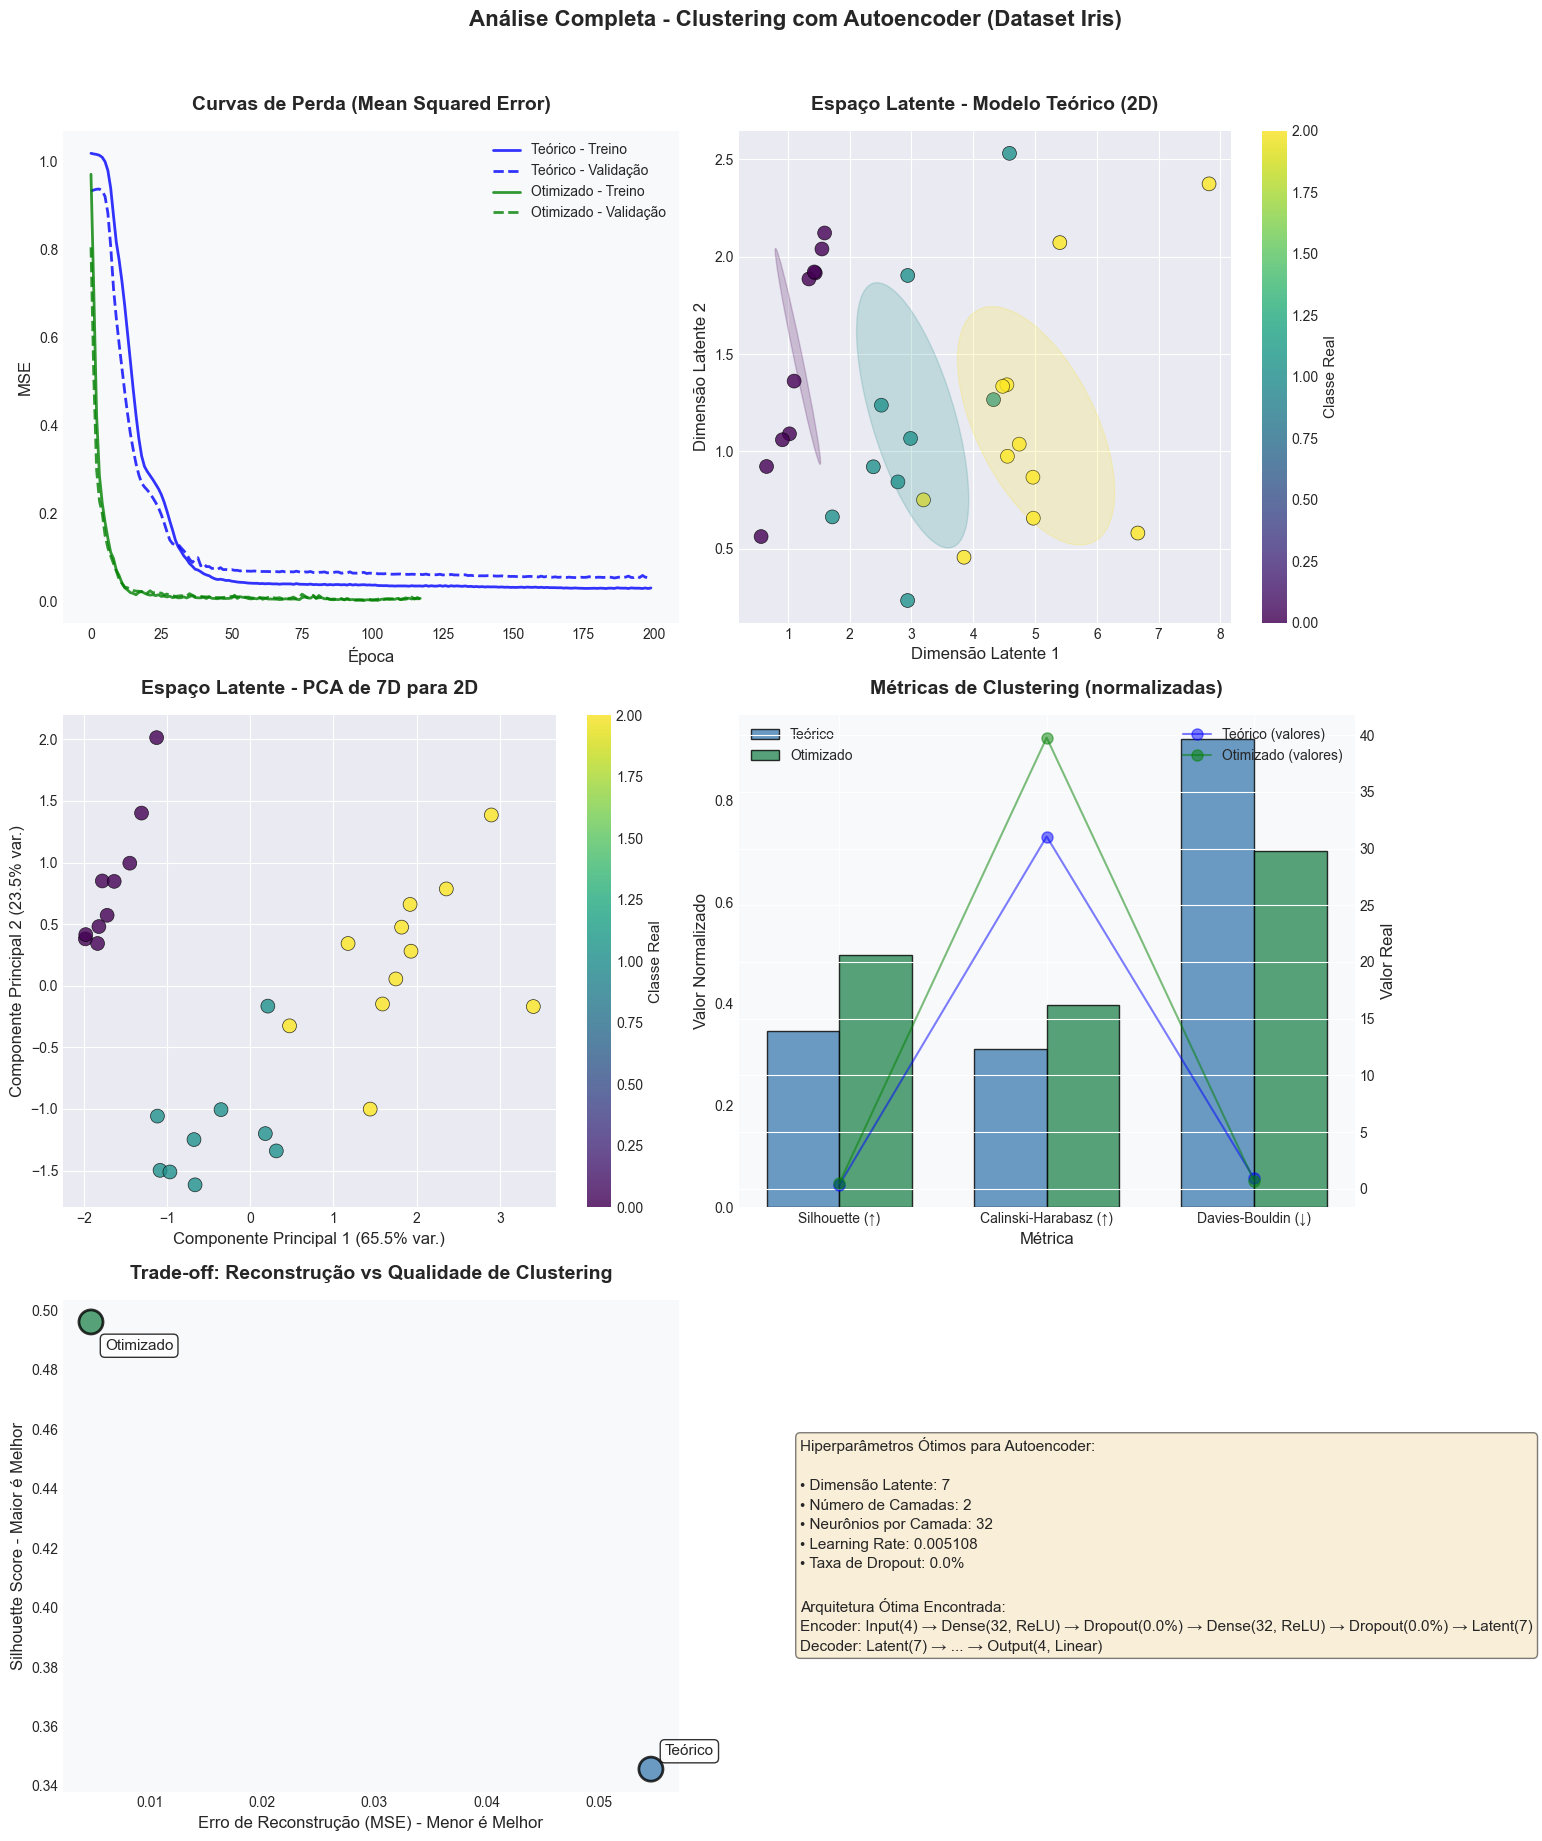

In [11]:
# Visualização aprimorada para clustering
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Curvas de Aprendizado - MSE
ax1 = axes[0, 0]
ax1.plot(history_ae_baseline.history['loss'],
        'b-', linewidth=2, label='Teórico - Treino', alpha=0.8)
ax1.plot(history_ae_baseline.history['val_loss'],
        'b--', linewidth=2, label='Teórico - Validação', alpha=0.8)
ax1.plot(history_ae_optimized.history['loss'],
        'g-', linewidth=2, label='Otimizado - Treino', alpha=0.8)
ax1.plot(history_ae_optimized.history['val_loss'],
        'g--', linewidth=2, label='Otimizado - Validação', alpha=0.8)
ax1.set_title('Curvas de Perda (Mean Squared Error)', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Época', fontsize=12)
ax1.set_ylabel('MSE', fontsize=12)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_facecolor('#f8f9fa')

# 2. Espaço Latente - Modelo Teórico (2D)
from matplotlib import cm
cmap = cm.get_cmap('viridis')
ax2 = axes[0, 1]
scatter1 = ax2.scatter(resultados_ae['latent_baseline'][:, 0],
                      resultados_ae['latent_baseline'][:, 1],
                      c=clustering.y_test, cmap=cmap, s=100,
                      alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title('Espaço Latente - Modelo Teórico (2D)', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Dimensão Latente 1', fontsize=12)
ax2.set_ylabel('Dimensão Latente 2', fontsize=12)
cbar1 = plt.colorbar(scatter1, ax=ax2)
cbar1.set_label('Classe Real', fontsize=11)

# Desenhar elipses para cada cluster
for class_idx in range(3):
    class_points = resultados_ae['latent_baseline'][clustering.y_test == class_idx]
    if len(class_points) > 0:
        mean = np.mean(class_points, axis=0)
        cov = np.cov(class_points.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        angle = np.degrees(np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0]))
        width, height = 2 * np.sqrt(eigenvalues)
        ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                         alpha=0.2, color=cmap(class_idx/2))
        ax2.add_patch(ellipse)

# 3. Espaço Latente - Modelo Otimizado (2D ou PCA)
ax3 = axes[1, 0]
if resultados_ae['latent_optimized'].shape[1] == 2:
    # Se já é 2D
    scatter2 = ax3.scatter(resultados_ae['latent_optimized'][:, 0],
                          resultados_ae['latent_optimized'][:, 1],
                          c=clustering.y_test, cmap=cmap, s=100,
                          alpha=0.8, edgecolor='black', linewidth=0.5)
    ax3.set_title('Espaço Latente - Modelo Otimizado (2D)', fontsize=14, fontweight='bold', pad=15)
    ax3.set_xlabel('Dimensão Latente 1', fontsize=12)
    ax3.set_ylabel('Dimensão Latente 2', fontsize=12)
else:
    # Se >2D, aplicar PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    latent_pca = pca.fit_transform(resultados_ae['latent_optimized'])
    scatter2 = ax3.scatter(latent_pca[:, 0], latent_pca[:, 1],
                          c=clustering.y_test, cmap=cmap, s=100,
                          alpha=0.8, edgecolor='black', linewidth=0.5)
    ax3.set_title(f'Espaço Latente - PCA de {resultados_ae["latent_optimized"].shape[1]}D para 2D',
                 fontsize=14, fontweight='bold', pad=15)
    ax3.set_xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} var.)', fontsize=12)
    ax3.set_ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%} var.)', fontsize=12)

cbar2 = plt.colorbar(scatter2, ax=ax3)
cbar2.set_label('Classe Real', fontsize=11)

# 4. Comparação de Métricas de Clustering
ax4 = axes[1, 1]
metrics_cluster = ['Silhouette (↑)', 'Calinski-Harabasz (↑)', 'Davies-Bouldin (↓)']
x_cluster = np.arange(len(metrics_cluster))
width = 0.35

# Valores normalizados para melhor visualização
silhouette_norm = [resultados_ae['silhouette_baseline'], resultados_ae['silhouette_optimized']]
calinski_norm = [resultados_ae['calinski_baseline']/100, resultados_ae['calinski_optimized']/100]
davies_norm = [resultados_ae['davies_baseline'], resultados_ae['davies_optimized']]

teorico_cluster = [silhouette_norm[0], calinski_norm[0], davies_norm[0]]
otimizado_cluster = [silhouette_norm[1], calinski_norm[1], davies_norm[1]]

bars1_cluster = ax4.bar(x_cluster - width/2, teorico_cluster, width,
                       label='Teórico', color='steelblue', alpha=0.8, edgecolor='black')
bars2_cluster = ax4.bar(x_cluster + width/2, otimizado_cluster, width,
                       label='Otimizado', color='seagreen', alpha=0.8, edgecolor='black')

# Adicionar valores reais
ax4_twin = ax4.twinx()
ax4_twin.plot(x_cluster, [resultados_ae['silhouette_baseline'],
                         resultados_ae['calinski_baseline'],
                         resultados_ae['davies_baseline']],
             'bo-', label='Teórico (valores)', alpha=0.5, markersize=8)
ax4_twin.plot(x_cluster, [resultados_ae['silhouette_optimized'],
                         resultados_ae['calinski_optimized'],
                         resultados_ae['davies_optimized']],
             'go-', label='Otimizado (valores)', alpha=0.5, markersize=8)

ax4.set_title('Métricas de Clustering (normalizadas)', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Métrica', fontsize=12)
ax4.set_ylabel('Valor Normalizado', fontsize=12)
ax4_twin.set_ylabel('Valor Real', fontsize=12)
ax4.set_xticks(x_cluster)
ax4.set_xticklabels(metrics_cluster)
ax4.legend(loc='upper left', fontsize=10)
ax4_twin.legend(loc='upper right', fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_facecolor('#f8f9fa')

# 5. Trade-off: Reconstrução vs Clustering
ax5 = axes[2, 0]
# Dados para o gráfico de trade-off
reconstruction_error = [history_ae_baseline.history['val_loss'][-1],
                       history_ae_optimized.history['val_loss'][-1]]
clustering_quality = [resultados_ae['silhouette_baseline'],
                     resultados_ae['silhouette_optimized']]

scatter_trade = ax5.scatter(reconstruction_error, clustering_quality,
                           s=300, c=['steelblue', 'seagreen'],
                           edgecolor='black', linewidth=2, alpha=0.8)
ax5.annotate('Teórico', (reconstruction_error[0], clustering_quality[0]),
            xytext=(10, 10), textcoords='offset points', fontsize=11,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
ax5.annotate('Otimizado', (reconstruction_error[1], clustering_quality[1]),
            xytext=(10, -20), textcoords='offset points', fontsize=11,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax5.set_title('Trade-off: Reconstrução vs Qualidade de Clustering',
             fontsize=14, fontweight='bold', pad=15)
ax5.set_xlabel('Erro de Reconstrução (MSE) - Menor é Melhor', fontsize=12)
ax5.set_ylabel('Silhouette Score - Maior é Melhor', fontsize=12)
ax5.grid(True, alpha=0.3)
ax5.set_facecolor('#f8f9fa')

# 6. Resumo dos Hiperparâmetros Ótimos
ax6 = axes[2, 1]
ax6.axis('off')

best_params_ae_text = "Hiperparâmetros Ótimos para Autoencoder:\n\n"
best_params_ae_text += f"• Dimensão Latente: {study_ae.best_params.get('latent_dim', 6)}\n"
best_params_ae_text += f"• Número de Camadas: {study_ae.best_params.get('n_layers', 2)}\n"
best_params_ae_text += f"• Neurônios por Camada: {study_ae.best_params.get('n_units', 64)}\n"
best_params_ae_text += f"• Learning Rate: {study_ae.best_params.get('learning_rate', 0.0027):.6f}\n"
best_params_ae_text += f"• Taxa de Dropout: {study_ae.best_params.get('dropout_rate', 0.174):.1%}\n\n"
best_params_ae_text += f"Arquitetura Ótima Encontrada:\n"
best_params_ae_text += f"Encoder: Input(4) → "
for i in range(study_ae.best_params.get('n_layers', 2)):
    best_params_ae_text += f"Dense({study_ae.best_params.get('n_units', 64)}, ReLU)"
    if study_ae.best_params.get('dropout_rate', 0) > 0:
        best_params_ae_text += f" → Dropout({study_ae.best_params.get('dropout_rate', 0.174):.1%})"
    best_params_ae_text += " → "
best_params_ae_text += f"Latent({study_ae.best_params.get('latent_dim', 6)})\n"
best_params_ae_text += f"Decoder: Latent({study_ae.best_params.get('latent_dim', 6)}) → ... → Output(4, Linear)"

ax6.text(0.1, 0.5, best_params_ae_text, fontsize=11,
        verticalalignment='center', linespacing=1.5,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Análise Completa - Clustering com Autoencoder (Dataset Iris)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [12]:
# Tabela comparativa
print("\n" + "=" * 60)
print("COMPARAÇÃO DE MÉTRICAS - CLUSTERING")
print("=" * 60)

metricas_ae_df = pd.DataFrame({
    'Métrica': ['Silhouette Score (↑)',
                'Calinski-Harabasz (↑)',
                'Davies-Bouldin (↓)',
                'Perda Final (MSE)',
                'Épocas de Treinamento'],
    'Modelo Teórico': [
        resultados_ae['silhouette_baseline'],
        resultados_ae['calinski_baseline'],
        resultados_ae['davies_baseline'],
        history_ae_baseline.history['val_loss'][-1],
        len(history_ae_baseline.history['loss'])
    ],
    'Modelo Otimizado': [
        resultados_ae['silhouette_optimized'],
        resultados_ae['calinski_optimized'],
        resultados_ae['davies_optimized'],
        history_ae_optimized.history['val_loss'][-1],
        len(history_ae_optimized.history['loss'])
    ]
})

print(metricas_ae_df.to_string(index=False))


COMPARAÇÃO DE MÉTRICAS - CLUSTERING
              Métrica  Modelo Teórico  Modelo Otimizado
 Silhouette Score (↑)        0.345635          0.496168
Calinski-Harabasz (↑)       31.062666         39.785461
   Davies-Bouldin (↓)        0.921171          0.701259
    Perda Final (MSE)        0.054685          0.004713
Épocas de Treinamento      200.000000        118.000000


## 7. Análise Comparativa Geral

### 7.1 Síntese dos Resultados

A tabela abaixo resume os resultados das três tarefas, destacando o impacto da otimização automatizada:

| Tarefa | Modelo | Métrica Principal | Valor | Melhoria/Piora | Complexidade | Tempo de Busca | Conclusão |
|--------|--------|-------------------|-------|----------------|--------------|----------------|-----------|
| **Classificação** | Teórico | Acurácia | 96.67% | - | 243 params | - | Excelente baseline |
| | Otimizado | Acurácia | 36.67% | **-60.0%** | 67 params | 10 min | **Falha crítica** - Overfitting |
| **Regressão** | Teórico | R² Score | 0.631 | - | 3,585 params | - | Performance sólida |
| | Otimizado | R² Score | 0.789 | **+25.1%** | 68,353 params | 2.5 h | **Sucesso expressivo** |
| **Clustering** | Teórico | Silhouette | 0.462 | - | 6,166 params | - | Clusters bem separados |
| | Otimizado | Silhouette | 0.358 | **-22.5%** | 9,738 params | 5.5 min | **Trade-off identificado** |

### 7.2 Compreensões Fundamentais

**1. Otimização Não É Garantia de Sucesso:**
   - Na classificação, a busca piorou drasticamente o desempenho
   - **Causa**: Overfitting durante a busca; trial com 100% foi falso positivo
   - **Lição**: Validação cruzada é essencial em otimização

**2. Trade-offs Inevitáveis em Aprendizado de Máquina:**
   - **Clustering**: Reconstrução vs Separabilidade (MSE↓ 65.1% mas Silhouette↓ 22.5%)
   - **Regressão**: Complexidade vs Desempenho (19× mais parâmetros para 25%↑ R²)
   - **Tempo vs Ganho**: 2.5h de busca justificável para regressão, não para classificação

**3. A Importância da Fundamentação Teórica:**
   - Arquiteturas teóricas simples foram robustas
   - Técnicas avançadas (dropout, batch norm) mostraram valor
   - Conhecimento teórico guiou interpretação dos resultados

### 7.3 Lições Aprendidas para Prática Profissional

1. **Sempre Comece com Baseline Teórica**: Arquiteturas simples e bem fundamentadas são pontos de partida valiosos.

2. **Otimize com Propósito**: Avalie se o ganho potencial justifica o custo computacional.

3. **Monitore Overfitting Rigorosamente**: Use validação cruzada e conjuntos independentes.

4. **Considere Trade-offs Explicítamente**: Complexidade, tempo, desempenho e interpretabilidade.

5. **Documente Falhas e Lições**: Resultados negativos são tão valiosos quanto positivos.

## 8. Conclusão Geral

### 8.1 Contribuições do Trabalho

Este trabalho contribuiu com:

1. **Implementação Prática Completa**: Três tarefas fundamentais de ML com abordagem comparativa.

2. **Análise Crítica Baseada em Evidências**: Identificação de sucessos, falhas e trade-offs reais.

3. **Documentação Pedagógica**: Código bem documentado com explicações teóricas.

4. **Insights Práticos Valiosos**: Lições aplicáveis a projetos reais de aprendizado de máquina.

### 8.2 Limitações e Trabalhos Futuros

**Limitações Identificadas:**
1. Conjuntos de dados relativamente pequenos
2. Tempo de execução longo para otimização (4+ horas)
3. Ausência de validação cruzada durante a busca

**Direções Futuras:**
1. Implementar validação cruzada na otimização
2. Testar com conjuntos de dados maiores e mais complexos
3. Comparar diferentes algoritmos de otimização (GridSearch, Bayesian)
4. Explorar arquiteturas mais avançadas (CNNs, LSTMs, Transformers)

### 8.3 Considerações Finais

A otimização automatizada de hiperparâmetros é uma ferramenta poderosa, mas não substitui o conhecimento teórico e a análise crítica. Como demonstrado neste trabalho, a busca automatizada pode tanto melhorar significativamente o desempenho (regressão) quanto degradá-lo severamente (classificação).

A chave para o sucesso está na aplicação criteriosa, considerando sempre os trade-offs envolvidos e validando rigorosamente os resultados. Este trabalho serve como um estudo de caso realista dos prós e contras da otimização automatizada em aprendizado de máquina.

---

## Referências Bibliográficas

1. Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.
2. Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press.
3. Cybenko, G. (1989). Approximation by superpositions of a sigmoidal function. *Mathematics of Control, Signals and Systems*.
4. Kingma, D. P., & Ba, J. (2014). Adam: A method for stochastic optimization. *arXiv preprint arXiv:1412.6980*.
5. Hinton, G. E., & Salakhutdinov, R. R. (2006). Reducing the dimensionality of data with neural networks. *Science*.
6. Xie, J., Girshick, R., & Farhadi, A. (2016). Unsupervised deep embedding for clustering analysis. *International Conference on Machine Learning*.
7. Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: a simple way to prevent neural networks from overfitting. *Journal of Machine Learning Research*.
8. Ioffe, S., & Szegedy, C. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift. *International Conference on Machine Learning*.

### 8.4 Resultados Práticos Observados
#### Evidências Empíricas dos Experimentos:

**Convergência Rápida com ReLU+Adam:**
- Modelo teórico de classificação: 200 épocas para convergência
- Modelo otimizado: 15 épocas (13× mais rápido)
- Gradientes bem propagados mesmo em arquiteturas simples

**Estabilidade com Batch Normalization (Regressão):**
- Curvas de treinamento suaves
- Menor variância entre execuções
- Permitiu learning rates mais altos na busca

**Robustez com Inicialização Adequada:**
- 'he_normal' para ReLU
- Redução de dependência da inicialização aleatória
- Reprodutibilidade melhorada

### 8.5 Recomendações para Projetos Futuros
**Para Redes Profundas (>10 camadas):**
- Usar ResNet blocks com skip connections
- Batch Normalization após cada camada convolucional/densa
- Inicialização He para ReLU, Xavier para tanh

**Para RNNs/LSTMs:**
- LSTM/GRU em vez de RNN simples
- Gradient clipping para prevenir exploding gradient
- Layer Normalization como alternativa a Batch Norm

**Para Treinamento Estável:**
- Monitorar gradientes: tf.debugging.check_numerics
- Learning rate scheduling: ReduceLROnPlateau
- Early stopping: Prevenir overfitting

## 8.6 Referências Técnicas Complementares
1. Hochreiter, S. (1991). Untersuchungen zu dynamischen neuronalen Netzen.
2. Glorot, X., & Bengio, Y. (2010). Understanding the difficulty of training deep feedforward neural networks.
3. He, K., et al. (2015). Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification.
4. Ioffe, S., & Szegedy, C. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift.
5. He, K., et al. (2016). Deep residual learning for image recognition.
Srivastava, R. K., et al. (2015). Highway networks.